### Introduction

This notebooks gather all the information written here https://facebook.github.io/prophet/.

### Pip install

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.plot import add_changepoints_to_plot, plot_forecast_component
from prophet.plot import plot_yearly
from prophet.utilities import regressor_coefficients

import warnings
warnings.filterwarnings("ignore")

### Import data

Dataset must contain two columns:

- Datastamp or Timestamp. It should follow the format expected by Pandas, namely YYYY-MM-DD or YYYY-MM-DD HH:MM:SS.
- A numeric value.

In [12]:
PATH = 'https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv'

data = pd.read_csv(PATH)

In [5]:
data.head()

ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572

In [6]:
data.tail()

ds          y
2900  2016-01-16   7.817223
2901  2016-01-17   9.273878
2902  2016-01-18  10.333775
2903  2016-01-19   9.125871
2904  2016-01-20   8.891374

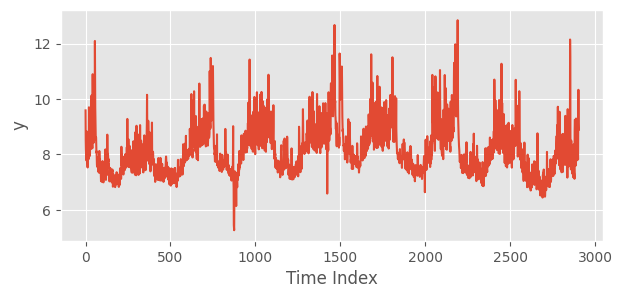

In [7]:
plt.figure(figsize = (7, 3))
plt.plot(data.y)
plt.ylabel('y')
plt.xlabel('Time Index');

In [8]:
# The default model is a linear additive model.

model = Prophet(growth='linear',
        changepoints=None,
        n_changepoints=25,
        changepoint_range=0.8,
        changepoint_prior_scale=0.05,

        yearly_seasonality='auto',
        weekly_seasonality='auto',
        daily_seasonality='auto',
        seasonality_mode='additive',
        seasonality_prior_scale=10.0,

        holidays=None,
        holidays_prior_scale=10.0,

        mcmc_samples=0,
        interval_width=0.8,
        uncertainty_samples=1000,
        stan_backend=None
        )
model.fit(data)
# It includes both the past values, i.e. the ones used for the fitting step,
# and the new ones.
future = model.make_future_dataframe(periods = 365)
future.head()

08:54:53 - cmdstanpy - INFO - Chain [1] start processing
08:54:55 - cmdstanpy - INFO - Chain [1] done processing


ds
0 2007-12-10
1 2007-12-11
2 2007-12-12
3 2007-12-13
4 2007-12-14

In [9]:
future.tail()

ds
3265 2017-01-15
3266 2017-01-16
3267 2017-01-17
3268 2017-01-18
3269 2017-01-19

In [10]:
forecast = model.predict(future)
forecast.head()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2007-12-10  8.040419    8.212201    9.458334     8.040419     8.040419   
1 2007-12-11  8.038879    8.005759    9.216221     8.038879     8.038879   
2 2007-12-12  8.037338    7.717855    9.018408     8.037338     8.037338   
3 2007-12-13  8.035798    7.775727    8.978319     8.035798     8.035798   
4 2007-12-14  8.034257    7.718559    8.975454     8.034257     8.034257   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0        0.802893              0.802893              0.802893  0.352293   
1        0.552971              0.552971              0.552971  0.119630   
2        0.350348              0.350348              0.350348 -0.066670   
3        0.329821              0.329821              0.329821 -0.072252   
4        0.319338              0.319338              0.319338 -0.069577   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0      0.352293      0.352293  0.450600      0.450600      0.450600   
1      0.119630      0.119630  0.433341      0.433341      0.433341   
2     -0.066670     -0.066670  0.417018      0.417018      0.417018   
3     -0.072252     -0.072252  0.402073      0.402073      0.402073   
4     -0.069577     -0.069577  0.388915      0.388915      0.388915   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper      yhat  
0                         0.0  8.843312  
1                         0.0  8.591850  
2                         0.0  8.387686  
3                         0.0  8.365619  
4                         0.0  8.353595

In [11]:
# blu line: predictions, white dots: actual
model.plot(forecast, figsize = (20, 7));

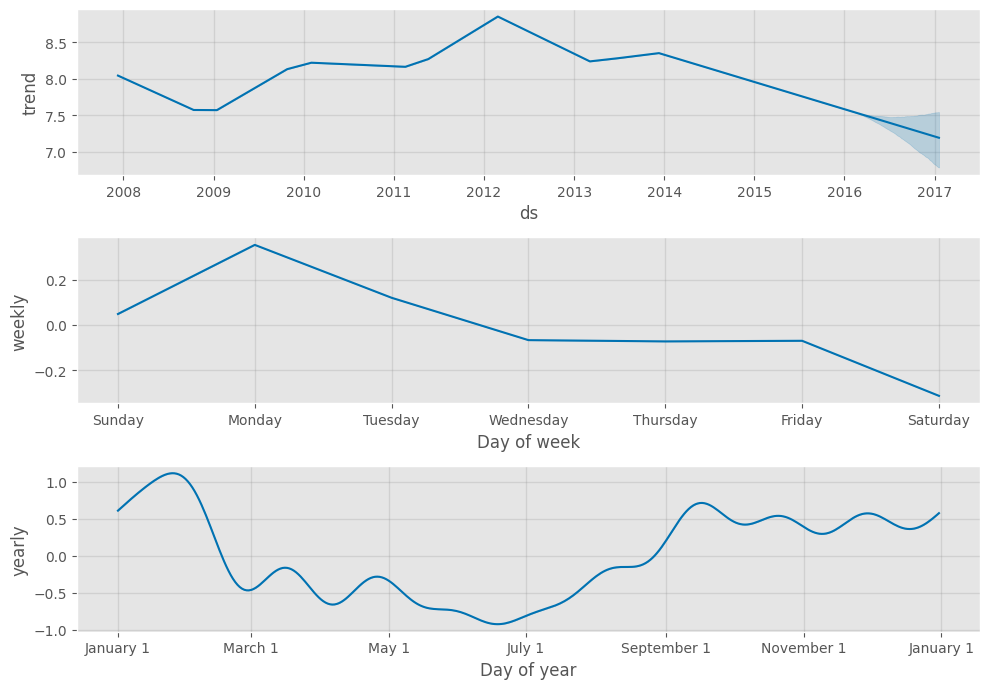

In [12]:
# By default, it shows the trend with the weekly and yearly seasonalities. 
model.plot_components(forecast, figsize = (10, 7));

In [13]:
# plot_plotly(model, forecast)

In [14]:
# plot_components_plotly(model, forecast)

### Forecasting growth

Prophet allows three types of growth: piecewise linear, piecewise logistic growth, and flat. The last one is used if there isn't a remarkable trend in the data; if growth = 'flat' but there is a trend, it will be included in the error term of the model.

Sometimes the forecasted variable can saturate, e.g. total market size, total population etc. Prophet allows us to make forecasts using a logisitc growth trend model. 

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_R.csv')

In [27]:
df.head()

ds         y
0  2008-01-30  5.976351
1  2008-01-16  6.049733
2  2008-01-17  6.011267
3  2008-01-14  5.953243
4  2008-01-15  5.910797

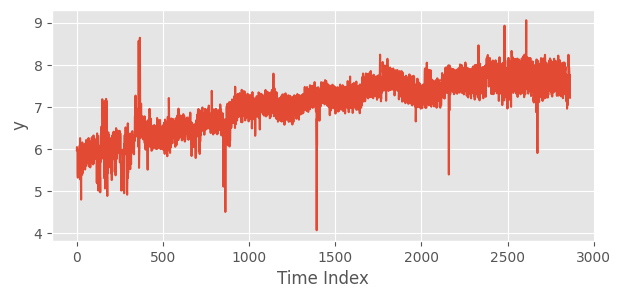

In [28]:
plt.figure(figsize = (7, 3))
plt.plot(df.y)
plt.ylabel('y')
plt.xlabel('Time Index');

In [29]:
# Set the carrying capacity. It must be defined for each row.
df['cap'] = 8.5

In [30]:
model = Prophet(growth = 'logistic')
model.fit(df)

09:03:06 - cmdstanpy - INFO - Chain [1] start processing
09:03:17 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
future = model.make_future_dataframe(365 * 5)
future['cap'] = 8.5
forecast = model.predict(future) 

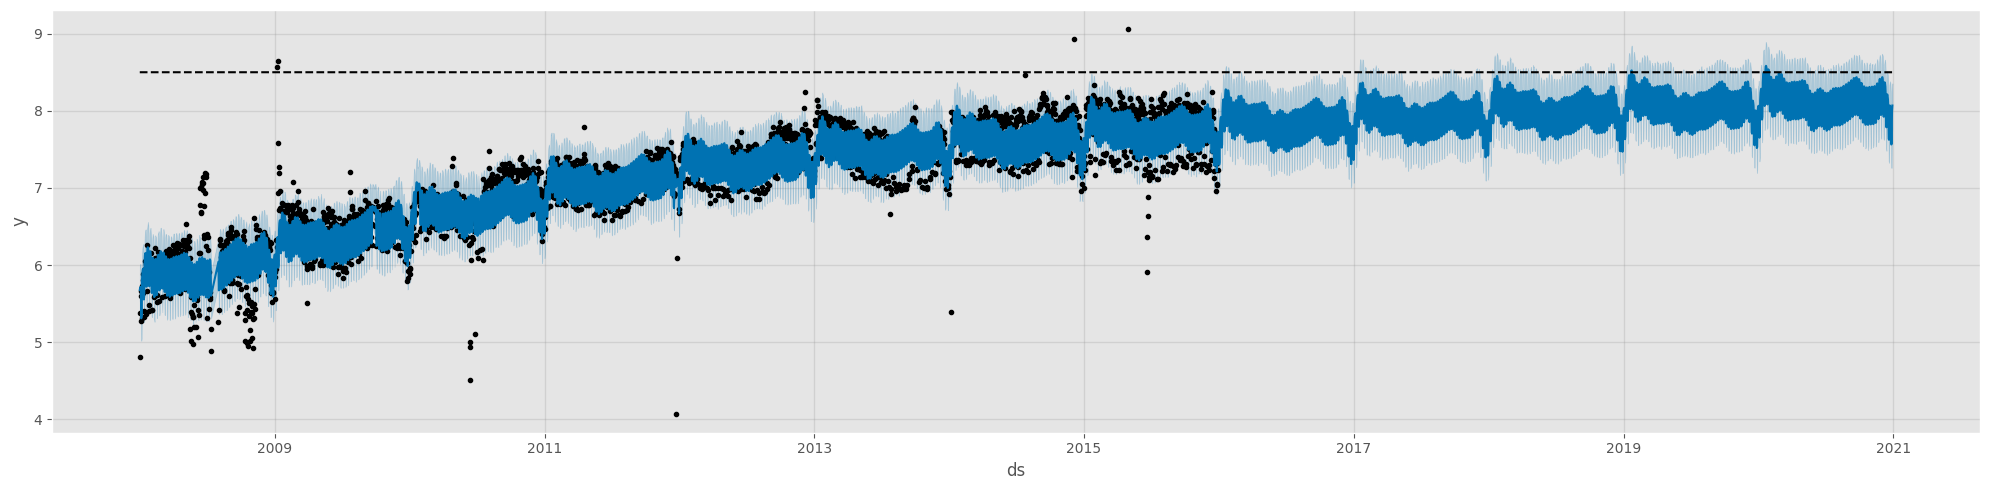

In [32]:
model.plot(forecast, figsize = (20, 5));

On the other hand, it is also possible to saturate the minimum. 

09:03:33 - cmdstanpy - INFO - Chain [1] start processing
09:03:33 - cmdstanpy - INFO - Chain [1] done processing


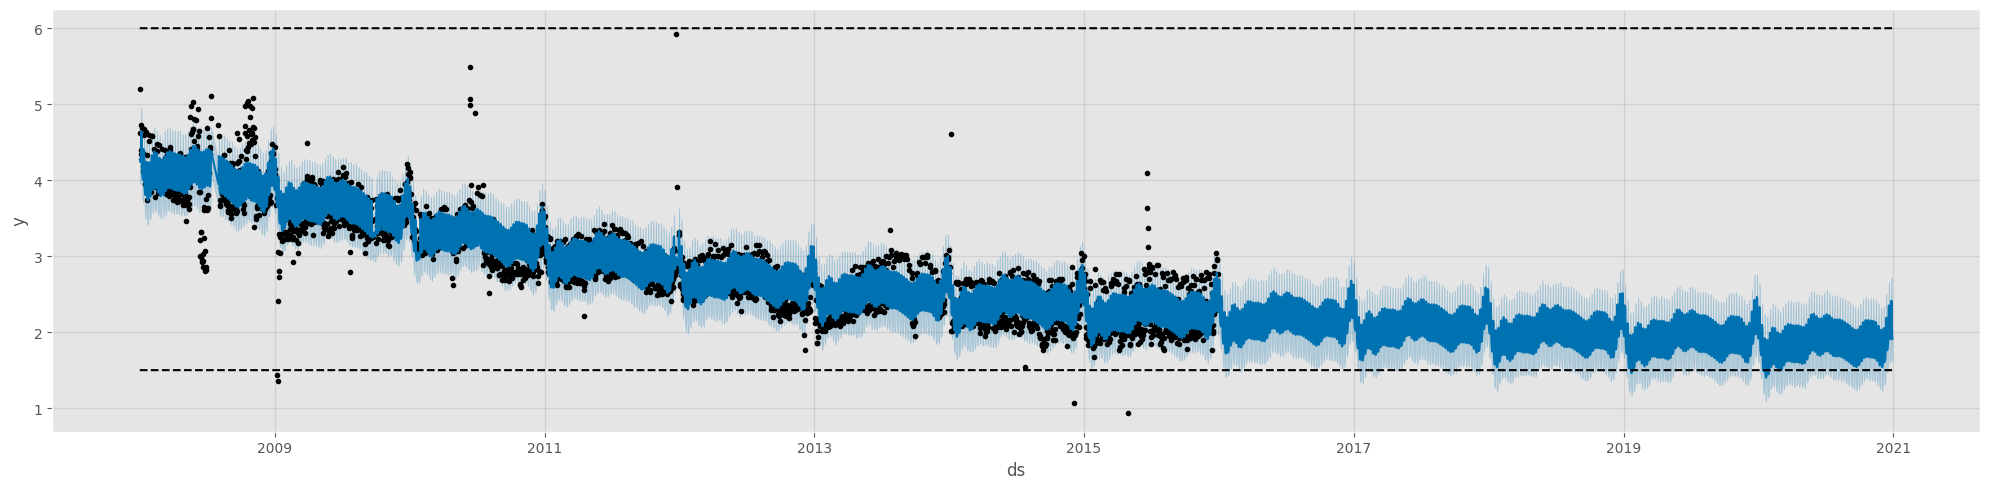

In [33]:
df['y'] = 10 - df['y']
df['cap'] = 6
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5
model = Prophet(growth='logistic')
model.fit(df)
fcst = model.predict(future)
model.plot(fcst, figsize = (20, 5));

### Trend changepoints

Changepoints are used by prophet to detect abrupt changes in the trajectory. _n_changepoints_ quantifies the number of possible changepoints which will be chosen by a regularization approach.

Moreover, by default the changepoints are inferred for the first 80% of the time series in order to avoid overfitting fluctuations at the end of the time series. However, this percentage can be modified with *changepoint_range*. 

The strength of the regularization approach can be tuned with the *changepoint_prior_scale*: the more that value is, the less the regularization will be.

In [197]:
model = Prophet(changepoint_prior_scale = 0.5)
model.fit(data)
future = model.make_future_dataframe(periods = 365)
forecast = model.predict(future)
fig = model.plot(forecast, figsize = (15, 5))
add_changepoints_to_plot(fig.gca(), model, forecast);

18:27:56 - cmdstanpy - INFO - Chain [1] start processing
18:27:58 - cmdstanpy - INFO - Chain [1] done processing


18:27:53 - cmdstanpy - INFO - Chain [1] start processing
18:27:54 - cmdstanpy - INFO - Chain [1] done processing


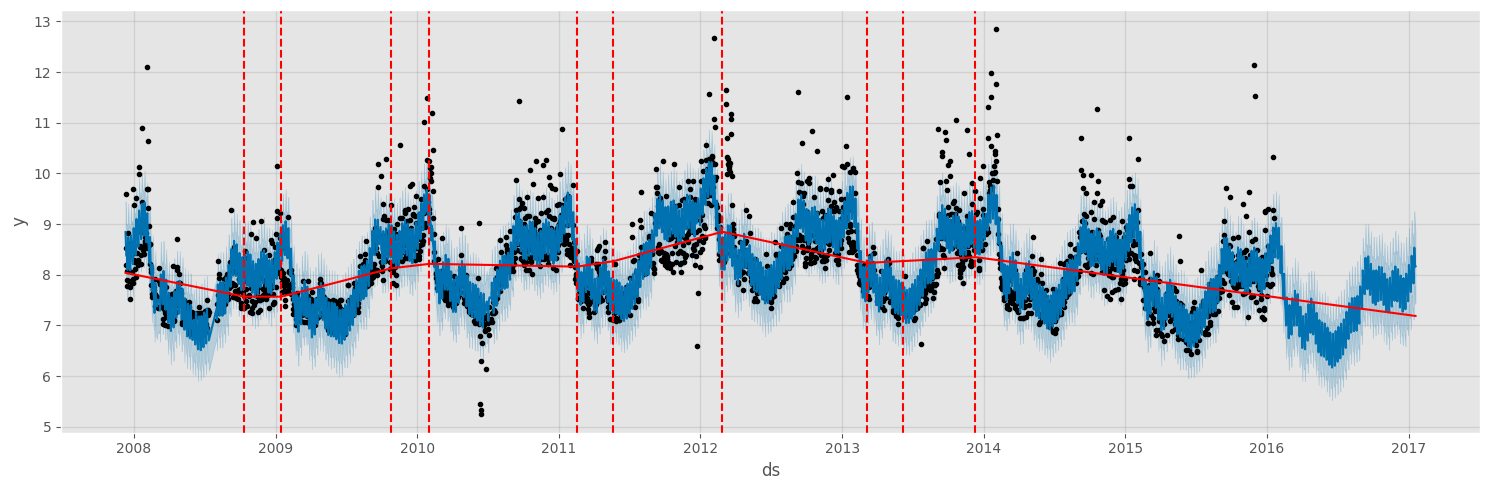

In [196]:
# Changepoints.
# The default model is a linear additive model.

model = Prophet(changepoint_prior_scale=0.05)
model.fit(data)
future = model.make_future_dataframe(periods = 365)
forecast = model.predict(future)
fig = model.plot(forecast, figsize = (15, 5))
add_changepoints_to_plot(fig.gca(), model, forecast);

18:28:10 - cmdstanpy - INFO - Chain [1] start processing
18:28:11 - cmdstanpy - INFO - Chain [1] done processing
18:28:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newton.
18:28:11 - cmdstanpy - INFO - Chain [1] start processing
18:28:19 - cmdstanpy - INFO - Chain [1] done processing


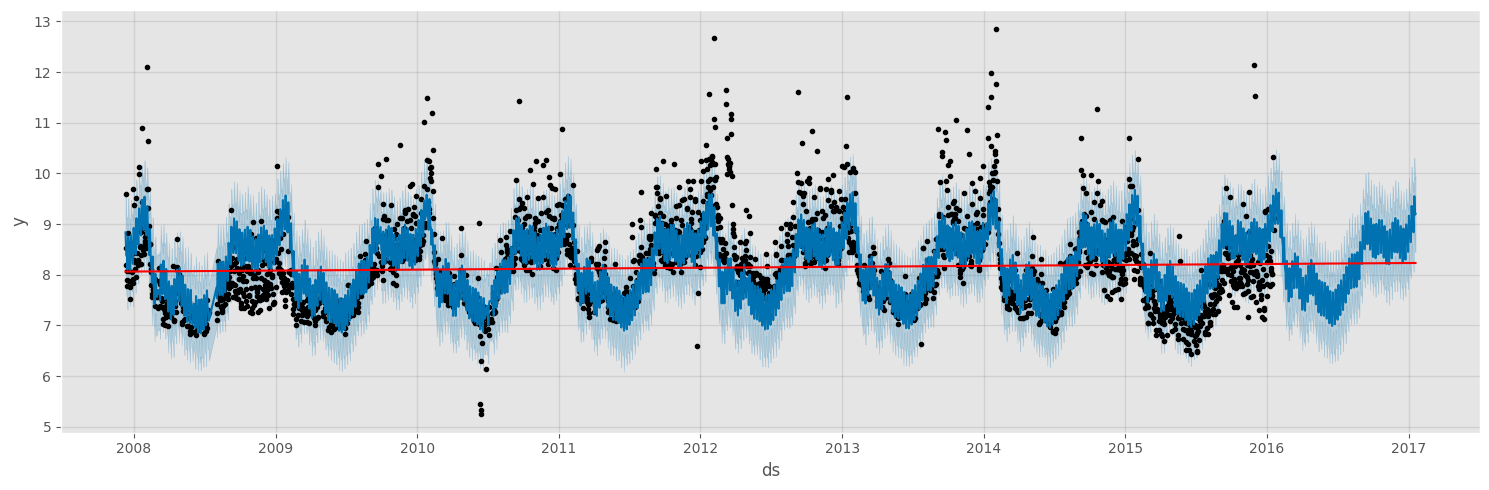

In [198]:
model = Prophet(changepoint_prior_scale = 0.0001)
model.fit(data)
future = model.make_future_dataframe(periods = 365)
forecast = model.predict(future)
fig = model.plot(forecast, figsize = (15, 5))
add_changepoints_to_plot(fig.gca(), model, forecast);

09:06:22 - cmdstanpy - INFO - Chain [1] start processing
09:06:22 - cmdstanpy - INFO - Chain [1] done processing


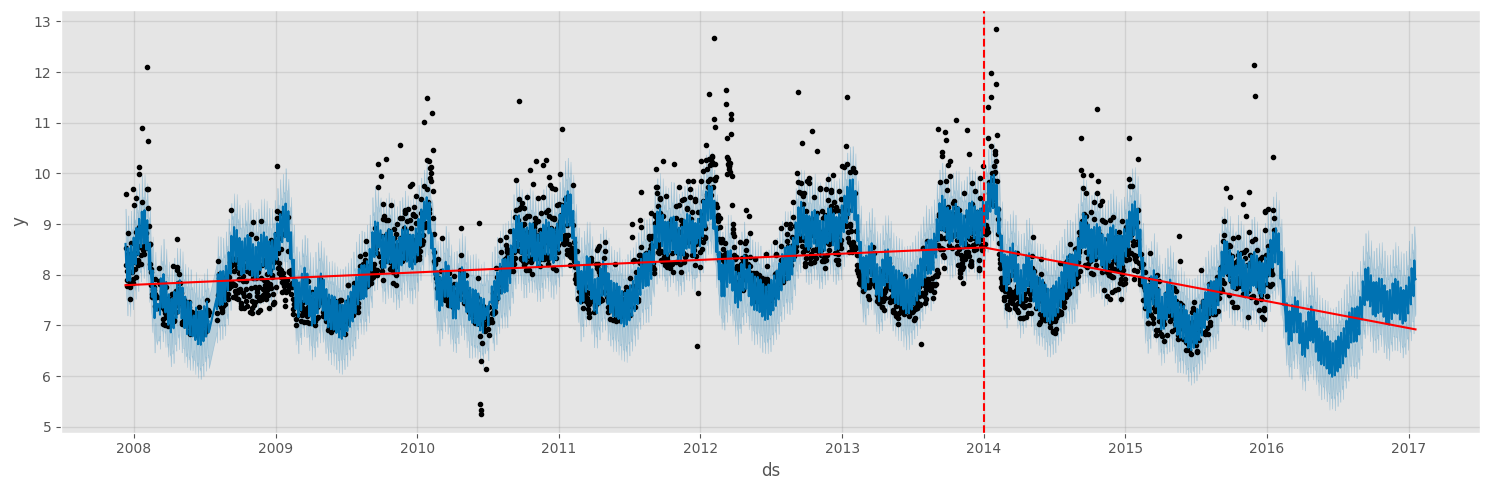

In [37]:
# Specify the position of changepoints.
model = Prophet(changepoints=['2014-01-01'])
model.fit(data)
future = model.make_future_dataframe(periods = 365)
forecast = model.predict(future)
fig = model.plot(forecast, figsize = (15, 5))
add_changepoints_to_plot(fig.gca(), model, forecast);

### Holidays

Holidays can be included in the model through some regressors. They can be extended around a specific date by means of [lower_window, upper_window].

Note that with weekly or monthly aggregated data, many holiday effects will be well-captured by the yearly seasonality, so added holidays may only be necessary for holidays that occur in different weeks throughout the time series.

In [38]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})

holidays = pd.concat((playoffs, superbowls)).sort_values(['ds'])
holidays.head()

holiday         ds  lower_window  upper_window
0  playoff 2008-01-13             0             1
1  playoff 2009-01-03             0             1
2  playoff 2010-01-16             0             1
3  playoff 2010-01-24             0             1
4  playoff 2010-02-07             0             1

In [39]:
# Holidays have their own confidence interval.
model = Prophet(holidays = holidays)
model.fit(data)
future = model.make_future_dataframe(periods = 365)
forecast = model.predict(future)
forecast.head()

09:07:42 - cmdstanpy - INFO - Chain [1] start processing
09:07:42 - cmdstanpy - INFO - Chain [1] done processing


ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2007-12-10  8.049142    8.263440    9.462930     8.049142     8.049142   
1 2007-12-11  8.047500    8.024537    9.182220     8.047500     8.047500   
2 2007-12-12  8.045857    7.838812    9.018798     8.045857     8.045857   
3 2007-12-13  8.044215    7.837228    8.971712     8.044215     8.044215   
4 2007-12-14  8.042572    7.834705    8.966418     8.042572     8.042572   

   additive_terms  additive_terms_lower  additive_terms_upper  holidays  ...  \
0        0.796185              0.796185              0.796185       0.0  ...   
1        0.585373              0.585373              0.585373       0.0  ...   
2        0.385716              0.385716              0.385716       0.0  ...   
3        0.367563              0.367563              0.367563       0.0  ...   
4        0.359794              0.359794              0.359794       0.0  ...   

     weekly  weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0  0.329558      0.329558      0.329558  0.466627      0.466627      0.466627   
1  0.133044      0.133044      0.133044  0.452329      0.452329      0.452329   
2 -0.053203     -0.053203     -0.053203  0.438919      0.438919      0.438919   
3 -0.059178     -0.059178     -0.059178  0.426740      0.426740      0.426740   
4 -0.056299     -0.056299     -0.056299  0.416093      0.416093      0.416093   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper      yhat  
0                         0.0  8.845327  
1                         0.0  8.632873  
2                         0.0  8.431573  
3                         0.0  8.411777  
4                         0.0  8.402366  

[5 rows x 28 columns]

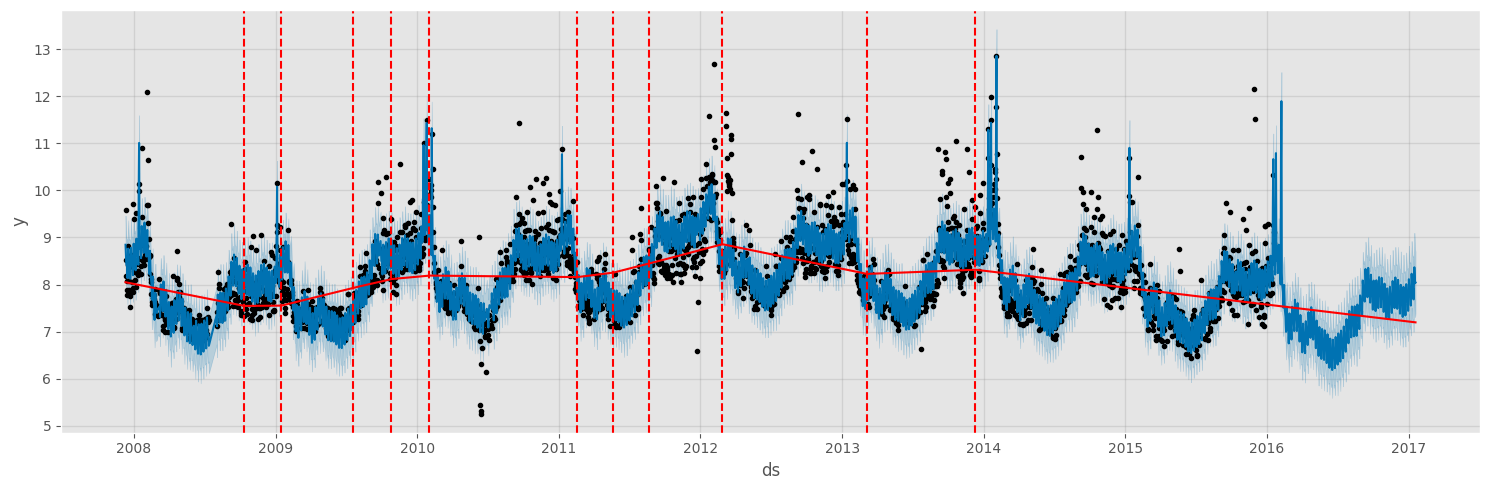

In [43]:
fig =  model.plot(forecast, figsize = (15, 5))
add_changepoints_to_plot(fig.gca(), model, forecast);

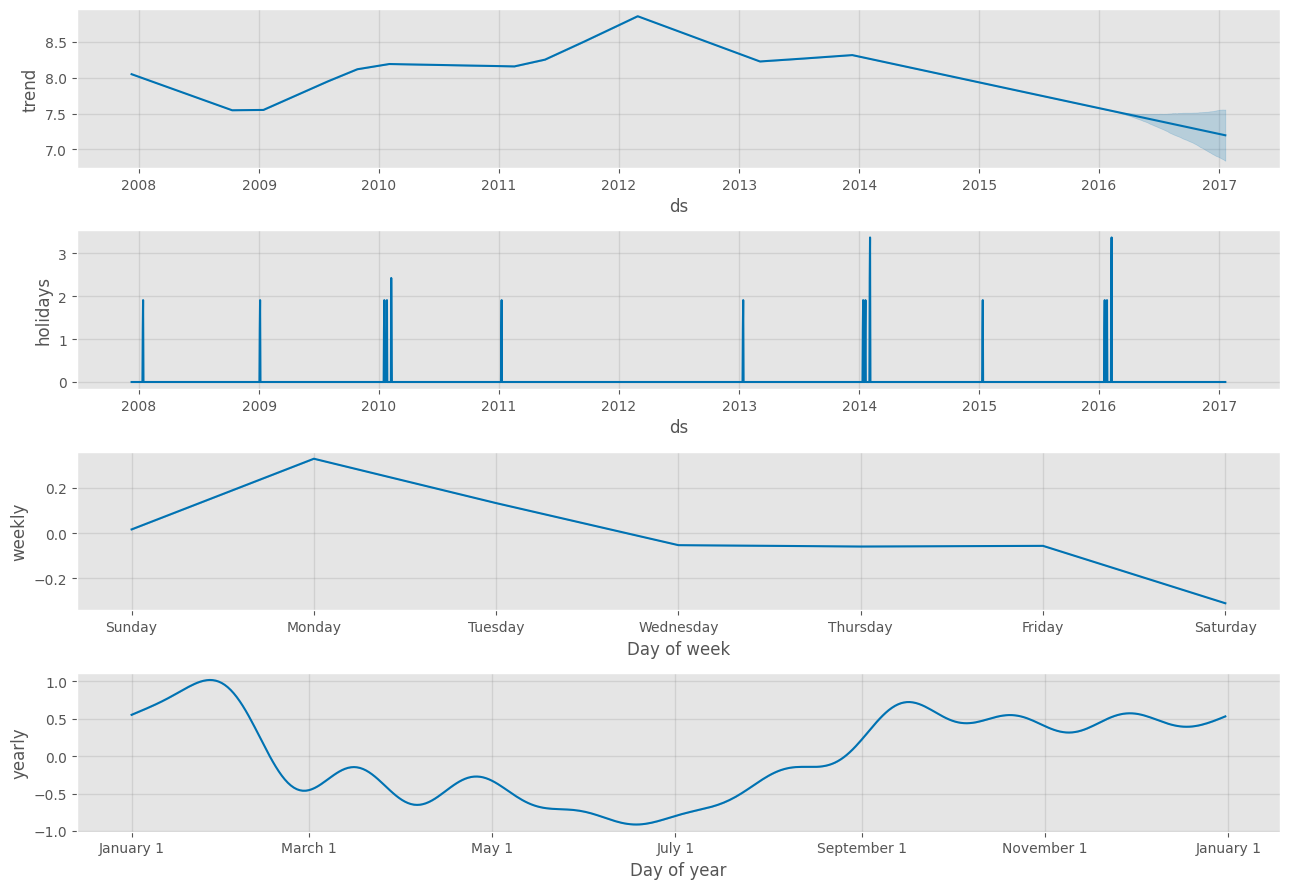

In [41]:
model.plot_components(forecast, figsize = (13, 9));

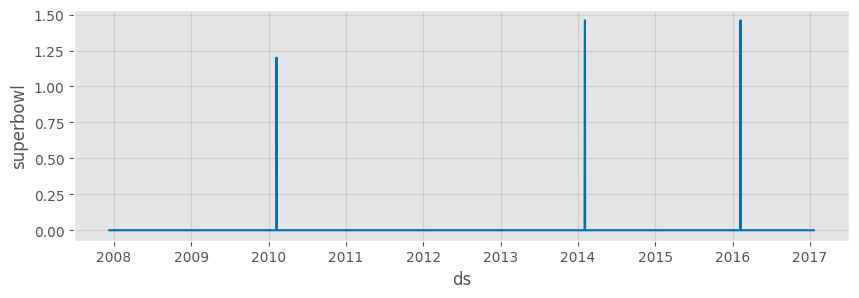

In [209]:
 plot_forecast_component(model, forecast, 'superbowl', figsize = (10, 3));

In [44]:
# It is possible to automatically add some holidays.
model = Prophet()
model.add_country_holidays(country_name = 'US')
model.fit(data)
forecast = model.predict(future)

09:11:33 - cmdstanpy - INFO - Chain [1] start processing
09:11:35 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
# View the used holidays:  https://github.com/dr-prodigy/python-holidays.
model.train_holiday_names

0                         playoff
1                       superbowl
2                  New Year's Day
3      Martin Luther King Jr. Day
4           Washington's Birthday
5                    Memorial Day
6                Independence Day
7                       Labor Day
8                    Columbus Day
9                    Veterans Day
10                   Thanksgiving
11                  Christmas Day
12       Christmas Day (Observed)
13        Veterans Day (Observed)
14    Independence Day (Observed)
15      New Year's Day (Observed)
dtype: object

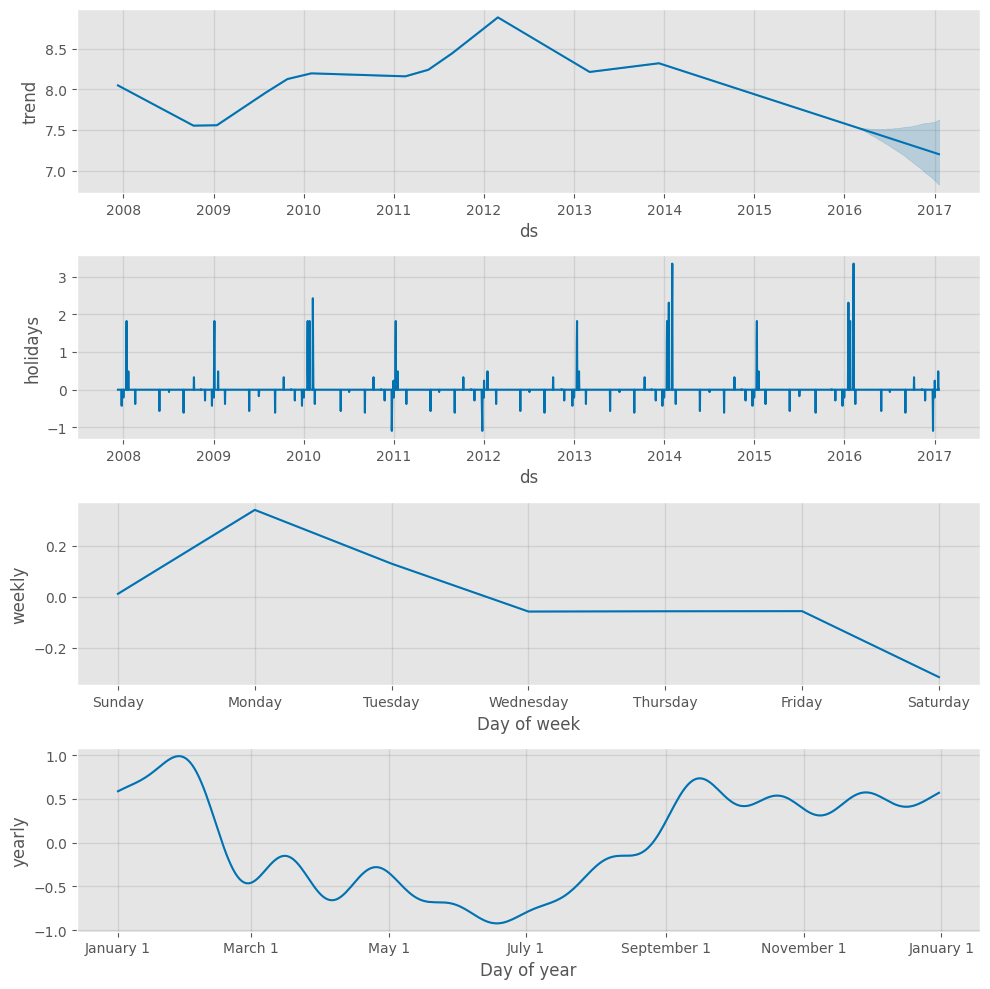

In [38]:
 model.plot_components(forecast, figsize = (10, 10));

In [53]:
# Holidays can overfit, so a regularization procedure can occur.
# The magnitude of the holiday effect has been reduced compared to before,
# especially for superbowls, which had the fewest observations.
model = Prophet(holidays = holidays, holidays_prior_scale = 0.05).fit(data)
forecast = model.predict(future)
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
    ['ds', 'playoff', 'superbowl']][-10:]

10:58:51 - cmdstanpy - INFO - Chain [1] start processing
10:58:52 - cmdstanpy - INFO - Chain [1] done processing


ds   playoff  superbowl
2190 2014-02-02  1.209095   0.951442
2191 2014-02-03  1.853105   0.991204
2532 2015-01-11  1.209095   0.000000
2533 2015-01-12  1.853105   0.000000
2901 2016-01-17  1.209095   0.000000
2902 2016-01-18  1.853105   0.000000
2908 2016-01-24  1.209095   0.000000
2909 2016-01-25  1.853105   0.000000
2922 2016-02-07  1.209095   0.951442
2923 2016-02-08  1.853105   0.991204

### Seasonality

Prophet uses the partial Fourier sum in order to estimate an arbitrary periodic signal.
The number of terms in the partial sum, i.e. the orders, is a parameter that determines how quickly the seasonality can change.

N Fourier terms corresponds to 2N variables used for modeling the cycle: so, pay attention because it can lead to ooverfitting.

By default, Prophet fits some seasonalities based on the frequency of the data. For example, it will fit weekly (order = 3) and yearly seasonalities (order = 10), if the time series is more than two cycles long, or daily seasonality if the frequency is daily.

09:19:04 - cmdstanpy - INFO - Chain [1] start processing
09:19:06 - cmdstanpy - INFO - Chain [1] done processing


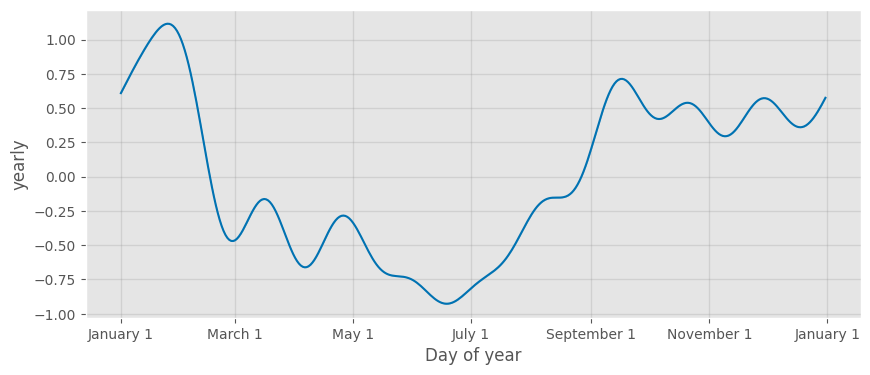

In [46]:
# yearly_seasonality = 10
model = Prophet().fit(data)
plot_yearly(model, figsize = (10, 4))

09:19:13 - cmdstanpy - INFO - Chain [1] start processing
09:19:16 - cmdstanpy - INFO - Chain [1] done processing


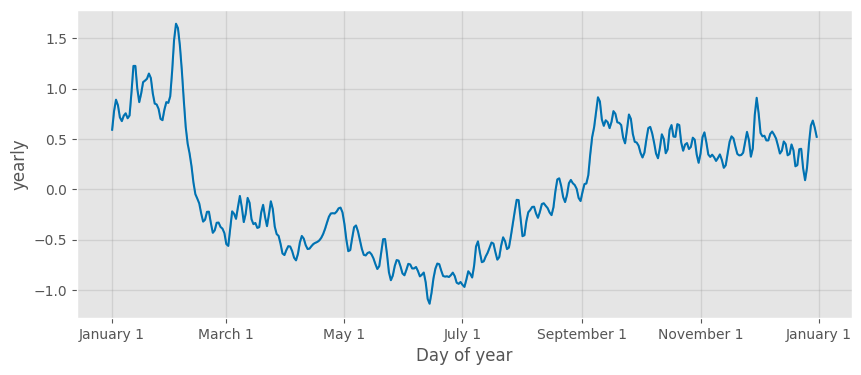

In [47]:
model = Prophet(yearly_seasonality = 100).fit(data)
plot_yearly(model, figsize = (10, 4))

09:21:07 - cmdstanpy - INFO - Chain [1] start processing
09:21:08 - cmdstanpy - INFO - Chain [1] done processing


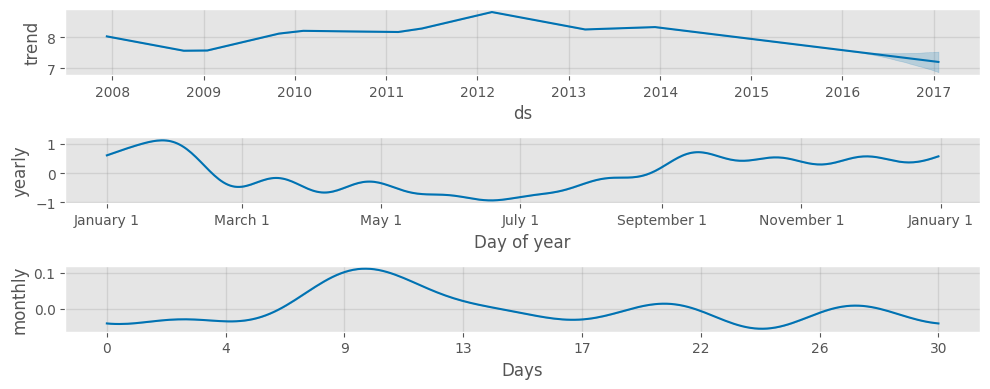

In [48]:
# Python
model = Prophet(weekly_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = model.fit(data).predict(future)
model.plot_components(forecast, figsize = (10, 4));

In [49]:
# Conditional seasonality: given a specific seasonality, it can change in the same pattern, e.g.
# there is a weekly seasonality but it is different in the weekdays and during the weekend, or
# it can take into account the on and off-season.

In [50]:
def is_nfl_season(ds):
    date = pd.to_datetime(ds)
    return (date.month > 8 or date.month < 2)

data['on_season'] = data['ds'].apply(is_nfl_season)
data['off_season'] = ~data['ds'].apply(is_nfl_season)

10:55:38 - cmdstanpy - INFO - Chain [1] start processing
10:55:39 - cmdstanpy - INFO - Chain [1] done processing


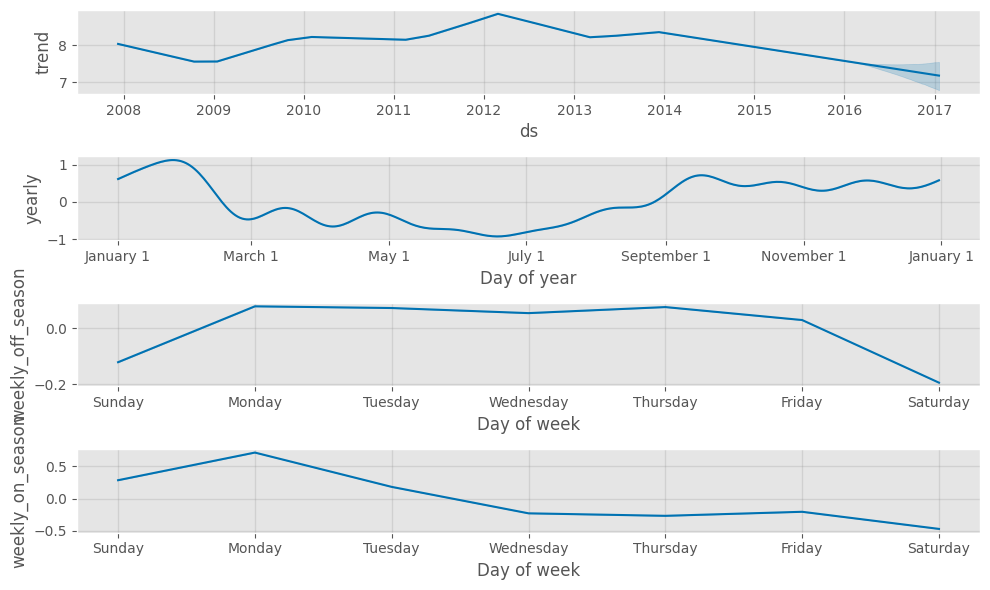

In [51]:
# It shows that there is a different weekly seasonality between the season_on and season_off.
# Indeed, when the season is off, there are no matches during weekend which is not true
# when the season is on.

model = Prophet(weekly_seasonality=False)
model.add_seasonality(name='weekly_on_season', period=7, fourier_order=3, condition_name='on_season')
model.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season')

future['on_season'] = future['ds'].apply(is_nfl_season)
future['off_season'] = ~future['ds'].apply(is_nfl_season)
forecast = model.fit(data).predict(future)
model.plot_components(forecast, figsize = (10, 6));

09:23:16 - cmdstanpy - INFO - Chain [1] start processing
09:23:18 - cmdstanpy - INFO - Chain [1] done processing


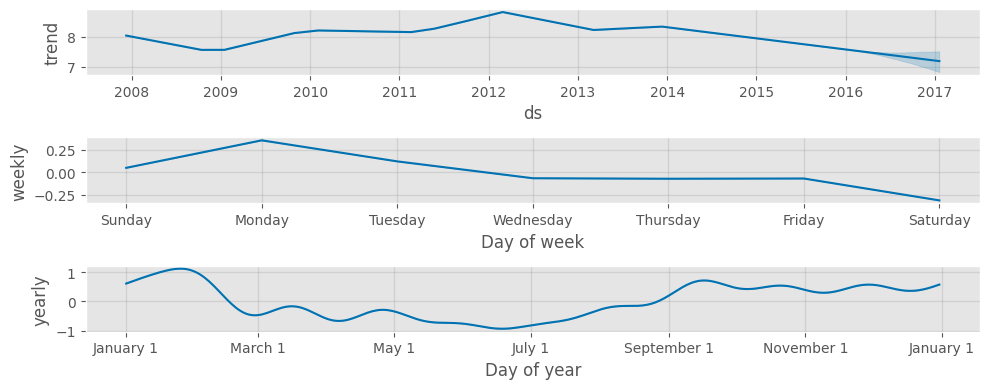

In [51]:
# also the seasonality can be regularized with seasonality_prior_scale.
model = Prophet()
model.add_seasonality(name='weekly', period=7, fourier_order=3, prior_scale=0.1)
forecast = model.fit(data).predict(future)
model.plot_components(forecast, figsize = (10, 4));

### Additional regressors

One additional regressor can be also another time series, e.g. the weather. Moreover, you can forecast that regressor in order to have some future values but it worth only if the forecast of the regressor'erros are less the ones of the target.

09:25:42 - cmdstanpy - INFO - Chain [1] start processing
09:25:44 - cmdstanpy - INFO - Chain [1] done processing


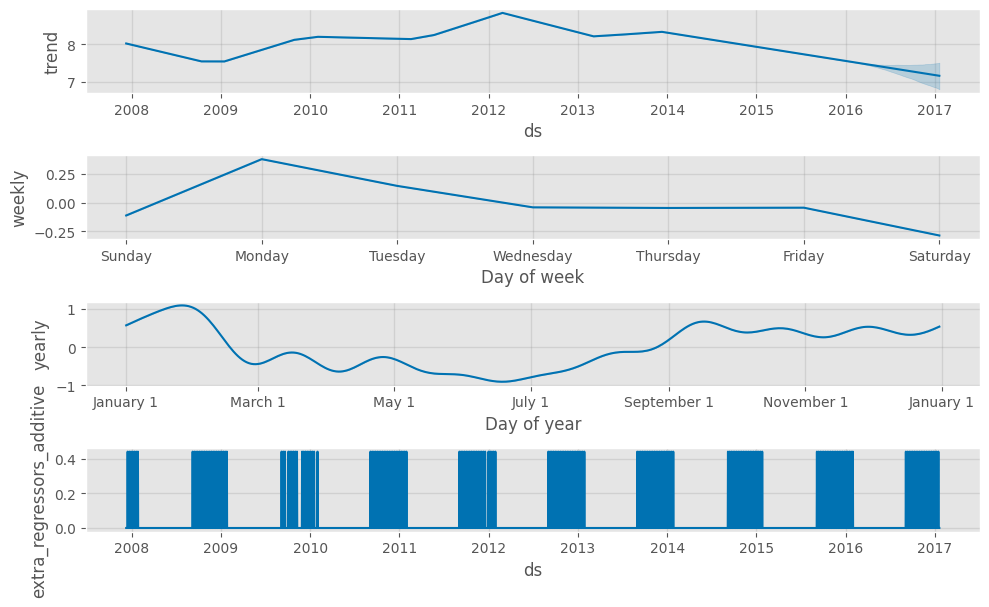

In [52]:
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0

data['nfl_sunday'] = data['ds'].apply(nfl_sunday)

model = Prophet()
model.add_regressor('nfl_sunday')
model.fit(data)

future['nfl_sunday'] = future['ds'].apply(nfl_sunday)

forecast = model.predict(future)
model.plot_components(forecast, figsize = (10, 6));

In [53]:
regressor_coefficients(model)

regressor regressor_mode  center  coef_lower      coef  coef_upper
0  nfl_sunday       additive     0.0    0.441638  0.441638    0.441638

### Multiplicative Seasonality

It is more common to add the seasonality to the trend, i.e. an additive seasonality. However, it can be possible that the seasonality increase with the trend, i.e. multiplicative seasonality.

In this situation, also for the other regressors, i.e. holidays, there is a multiplicative factor unless you specify that it should be additive.

Note, however, that it is pretty unlikely to have a mix of additive and multiplicative seasonalities, so this will generally only be used if there is a reason to expect that to be the case.

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv')
df.head()

ds    y
0  1949-01-01  112
1  1949-02-01  118
2  1949-03-01  132
3  1949-04-01  129
4  1949-05-01  121

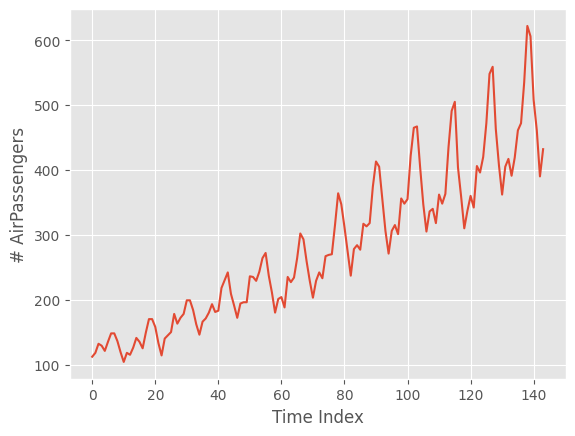

In [55]:
plt.plot(df.y)
plt.xlabel('Time Index')
plt.ylabel('# AirPassengers');

09:27:14 - cmdstanpy - INFO - Chain [1] start processing
09:27:14 - cmdstanpy - INFO - Chain [1] done processing


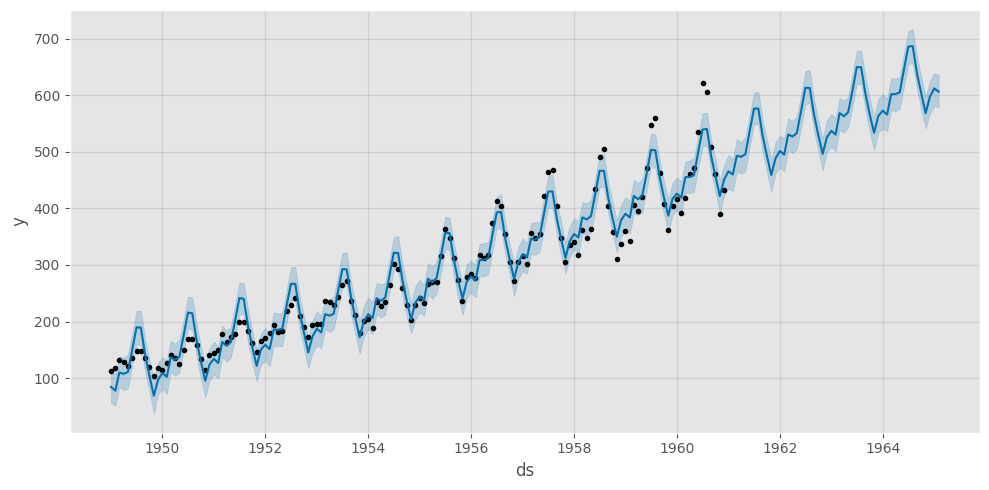

In [56]:
# The main problem of an addititive seasonality is that it cannot take into account
# the different amplitude of the seasonality at the beggining and the ending part of
# the time series.

m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast, figsize = (10, 5))

09:27:28 - cmdstanpy - INFO - Chain [1] start processing
09:27:28 - cmdstanpy - INFO - Chain [1] done processing


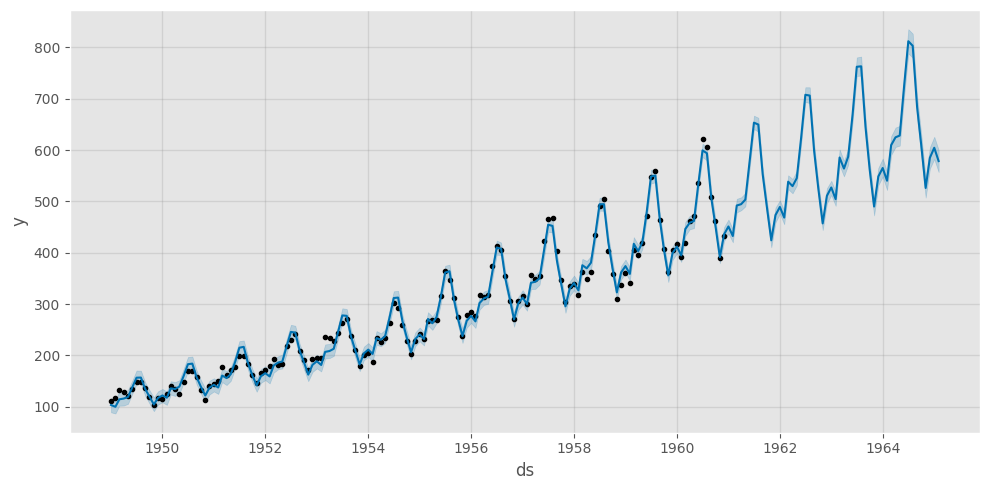

In [57]:
m = Prophet(seasonality_mode = 'multiplicative')
m.fit(df)
forecast = m.predict(future)
m.plot(forecast, figsize = (10, 5));

### Uncertainty Intervals

The incertainty of the predictions are based on three sources:
- Trend. It is the main source of uncertainty. It relies on the hypothesis that the rate of change on the trend in the training set will be the same also in the test set: so, we project these tred changes forward and by computing their distribution we obtain uncertainty intervals. This assumption is probably not true, so you should not expect to get accurate coverage on these uncertainty intervals.  This is because if we model more rate changes in the history then we will expect more in the future, and makes the uncertainty intervals a useful indicator of overfitting.
- Seasonality. By default, Prophet will only return uncertainties related to the trend and observation noise. To get incertainty in the seasonality, you must do _full Bayesian sampling_.
- Observation noise

In [ ]:
# for uncertainty in the seasonality.
m = Prophet(mcmc_samples=300)
future = model.make_future_dataframe(periods = 365)
forecast = m.fit(data, show_progress=False).predict(future)
m.plot_components(forecast, figsize = (10, 4));

09:59:44 - cmdstanpy - INFO - CmdStan installation C:\Users\ravazzil\Anaconda3\envs\github_env\lib\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
09:59:44 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
09:59:44 - cmdstanpy - INFO - CmdStan start processing
09:59:44 - cmdstanpy - INFO - Chain [1] start processing
09:59:44 - cmdstanpy - INFO - Chain [2] start processing
09:59:44 - cmdstanpy - INFO - Chain [3] start processing
09:59:44 - cmdstanpy - INFO - Chain [4] start processing


###  Outliers

If outliers aren't taken into account in the model, it will be included in the trend.

So, the best option is to remove them: prophet is able to deal with this situation.

Mreover, if you aggregate data from a monthly to weekly frequency, the outlier should be defined at weekly level. On the oter hand, many holiday effects will be wel-captured by yearly-seasonality.

14:41:42 - cmdstanpy - INFO - Chain [1] start processing
14:41:43 - cmdstanpy - INFO - Chain [1] done processing


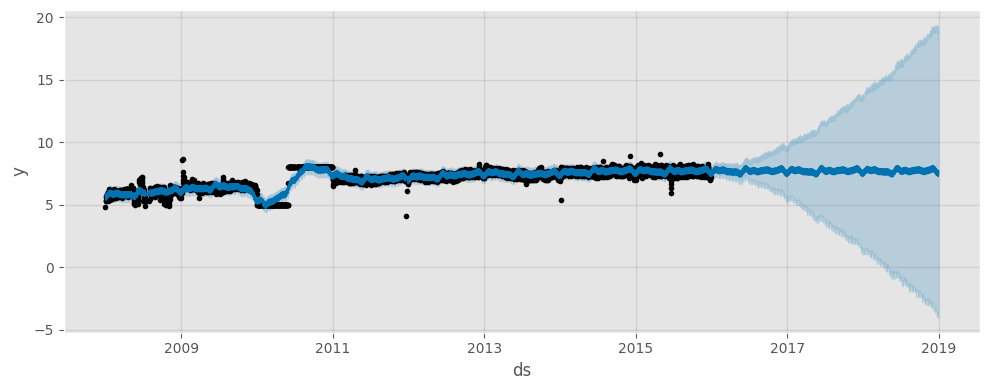

In [93]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_R_outliers1.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1096)
forecast = m.predict(future)
fig = m.plot(forecast, figsize = (10, 4))

14:29:49 - cmdstanpy - INFO - Chain [1] start processing
14:29:50 - cmdstanpy - INFO - Chain [1] done processing


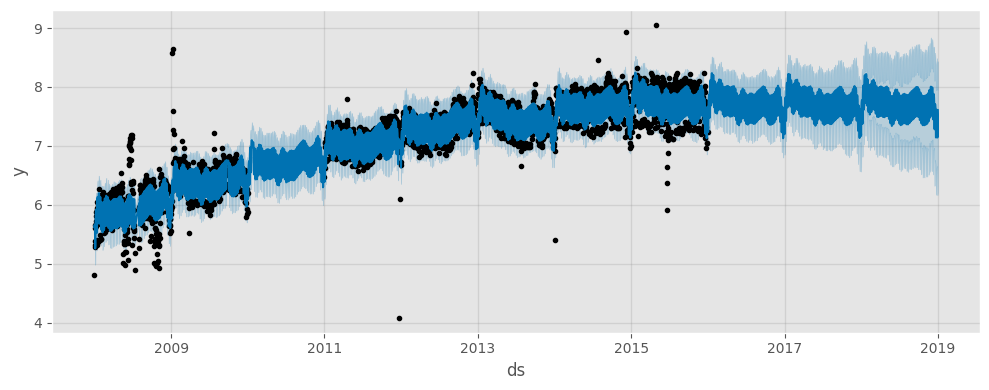

In [88]:
# Prophet imputes missing values. In this case, the
# confidence interval shrink but the predictions remain
# the same (but it isn't always the case).
df.loc[(df['ds'] > '2010-01-01') & (df['ds'] < '2011-01-01'), 'y'] = None
model = Prophet().fit(df)
future = model.make_future_dataframe(periods=1096)
fig = model.plot(model.predict(future), figsize = (10, 4))

### Non-Daily Data

When the format of ds is YYYY-MM-DD HH:MM:SS, Prophet automaticaly fits a daily seasonality.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_yosemite_temps.csv')
df.head()

ds     y
0  2017-05-01 00:00:00  27.8
1  2017-05-01 00:05:00  27.0
2  2017-05-01 00:10:00  26.8
3  2017-05-01 00:15:00  26.5
4  2017-05-01 00:20:00  25.6

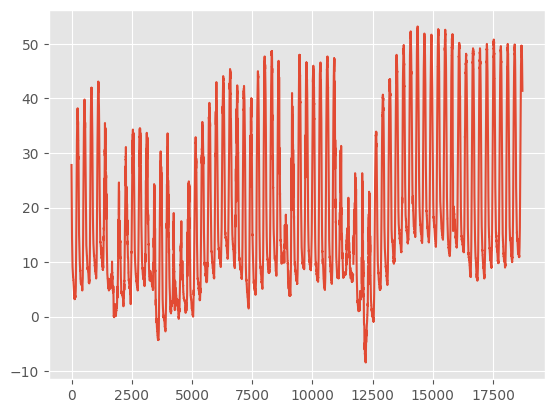

In [3]:
plt.plot(df.y);

10:10:03 - cmdstanpy - INFO - Chain [1] start processing
10:10:09 - cmdstanpy - INFO - Chain [1] done processing


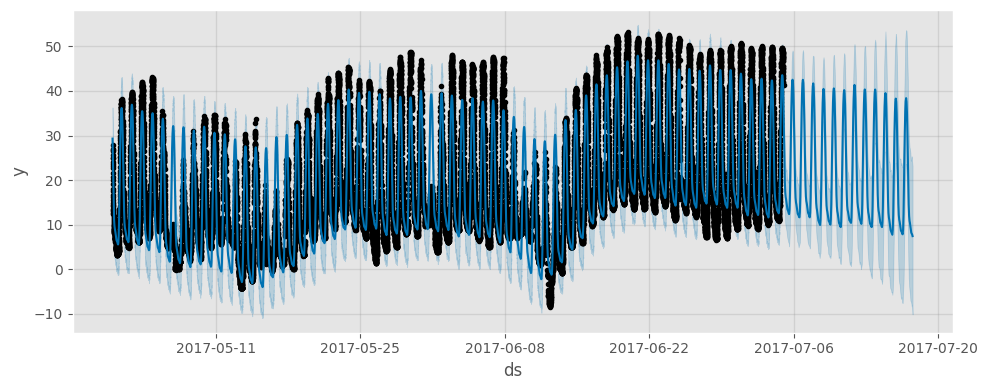

In [4]:
m = Prophet(changepoint_prior_scale=0.01).fit(df)
future = m.make_future_dataframe(periods=300, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst, figsize = (10, 4))

### Gaps in data

10:10:24 - cmdstanpy - INFO - Chain [1] start processing
10:10:27 - cmdstanpy - INFO - Chain [1] done processing


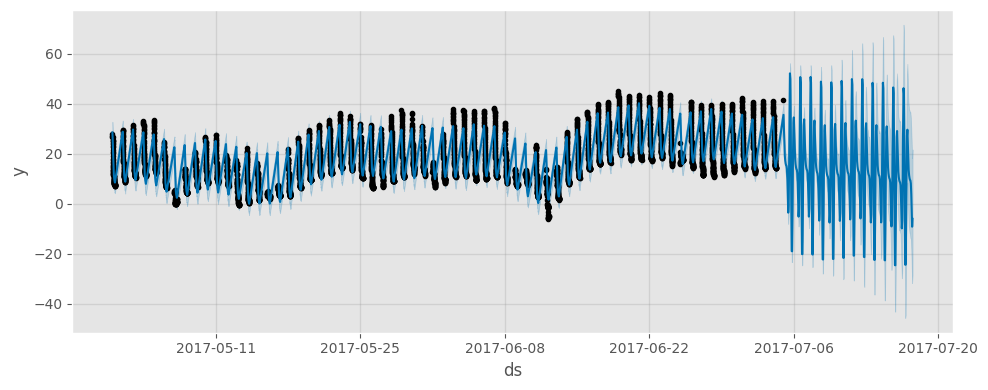

In [5]:
# Data gaps.
df2 = df.copy()
df2['ds'] = pd.to_datetime(df2['ds'])
df2 = df2[df2['ds'].dt.hour < 6]
m = Prophet().fit(df2)
future = m.make_future_dataframe(periods=300, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst, figsize = (10, 4))

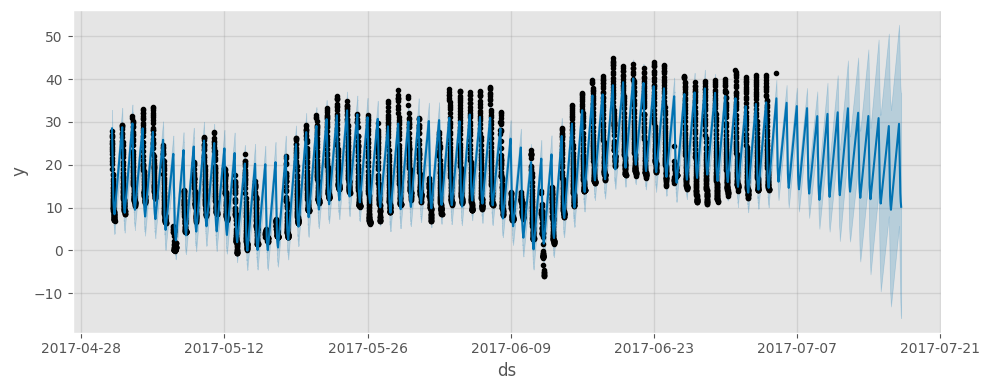

In [6]:
# Drop data that aren't in the gap.
future2 = future.copy()
future2 = future2[future2['ds'].dt.hour < 6]
fcst = m.predict(future2)
fig = m.plot(fcst, figsize = (10, 4))

### Monthly data

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_retail_sales.csv')
df.head()

ds       y
0  1992-01-01  146376
1  1992-02-01  147079
2  1992-03-01  159336
3  1992-04-01  163669
4  1992-05-01  170068

10:10:50 - cmdstanpy - INFO - Chain [1] start processing
10:10:51 - cmdstanpy - INFO - Chain [1] done processing


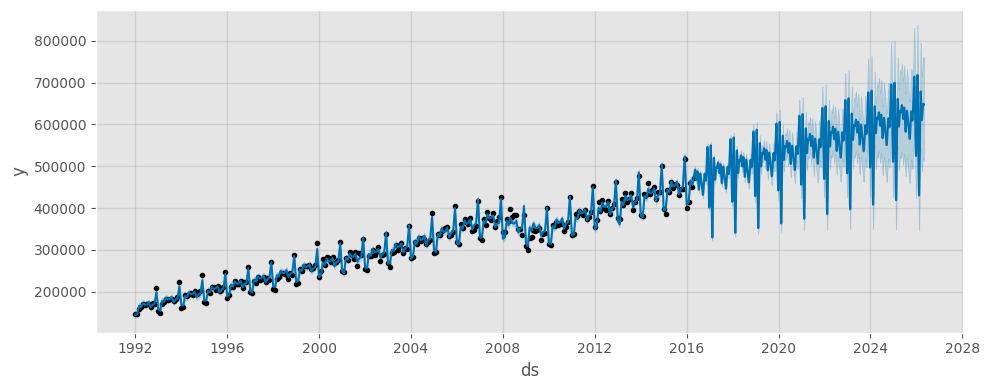

In [8]:
# Even here the predictions take into account the months,
m = Prophet(seasonality_mode = 'multiplicative').fit(df)
future = m.make_future_dataframe(periods=3652)
fcst = m.predict(future)
fig = m.plot(fcst, figsize = (10, 4))

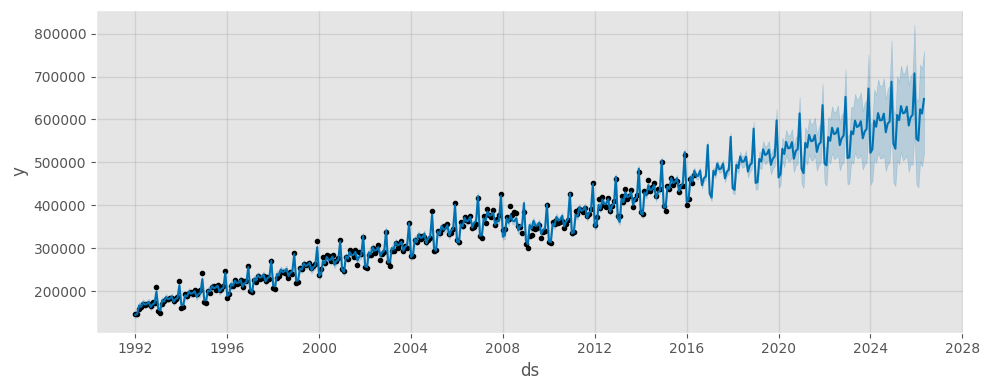

In [9]:
fcst = fcst[fcst.ds.dt.day == 1]
fig = m.plot(fcst, figsize = (10, 4))

### Cross Validation


In [10]:
from prophet.diagnostics import cross_validation

In [14]:
model = Prophet()
model.fit(data)
future = model.make_future_dataframe(periods = 365)
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

10:11:52 - cmdstanpy - INFO - Chain [1] start processing
10:11:54 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/11 [00:00<?, ?it/s]

10:11:56 - cmdstanpy - INFO - Chain [1] start processing
10:11:57 - cmdstanpy - INFO - Chain [1] done processing
10:11:59 - cmdstanpy - INFO - Chain [1] start processing
10:12:00 - cmdstanpy - INFO - Chain [1] done processing
10:12:01 - cmdstanpy - INFO - Chain [1] start processing
10:12:01 - cmdstanpy - INFO - Chain [1] done processing
10:12:03 - cmdstanpy - INFO - Chain [1] start processing
10:12:04 - cmdstanpy - INFO - Chain [1] done processing
10:12:05 - cmdstanpy - INFO - Chain [1] start processing
10:12:06 - cmdstanpy - INFO - Chain [1] done processing
10:12:07 - cmdstanpy - INFO - Chain [1] start processing
10:12:07 - cmdstanpy - INFO - Chain [1] done processing
10:12:09 - cmdstanpy - INFO - Chain [1] start processing
10:12:09 - cmdstanpy - INFO - Chain [1] done processing
10:12:11 - cmdstanpy - INFO - Chain [1] start processing
10:12:11 - cmdstanpy - INFO - Chain [1] done processing
10:12:13 - cmdstanpy - INFO - Chain [1] start processing
10:12:13 - cmdstanpy - INFO - Chain [1]

In [15]:
from prophet.diagnostics import performance_metrics

In [16]:
df_p = performance_metrics(df_cv)
df_p.tail(20)

horizon       mse      rmse       mae      mape     mdape     smape  \
309 346 days  0.869167  0.932291  0.758635  0.094151  0.081010  0.093564   
310 347 days  0.901724  0.949592  0.772335  0.095489  0.081557  0.094926   
311 348 days  0.928003  0.963329  0.782548  0.096477  0.082468  0.095922   
312 349 days  0.943184  0.971176  0.787866  0.096936  0.082468  0.096338   
313 350 days  0.947741  0.973520  0.788801  0.096999  0.082468  0.096367   
314 351 days  0.954693  0.977084  0.790213  0.097189  0.082153  0.096487   
315 352 days  0.961940  0.980786  0.794444  0.097530  0.082153  0.096798   
316 353 days  0.976582  0.988222  0.799749  0.097956  0.083026  0.097260   
317 354 days  0.999450  0.999725  0.805551  0.098313  0.083026  0.097658   
318 355 days  1.027209  1.013513  0.812050  0.098792  0.082068  0.098129   
319 356 days  1.037792  1.018721  0.816708  0.099059  0.082468  0.098391   
320 357 days  1.049874  1.024634  0.823426  0.099656  0.083026  0.098972   
321 358 days  1.062339  1.030698  0.829944  0.100260  0.083388  0.099532   
322 359 days  1.078456  1.038487  0.837588  0.101017  0.084969  0.100225   
323 360 days  1.097718  1.047720  0.848438  0.102097  0.086154  0.101286   
324 361 days  1.133834  1.064816  0.861923  0.103316  0.085557  0.102522   
325 362 days  1.149247  1.072029  0.868596  0.103923  0.086592  0.103081   
326 363 days  1.170650  1.081966  0.876116  0.104687  0.087437  0.103720   
327 364 days  1.187045  1.089516  0.883774  0.105621  0.089045  0.104468   
328 365 days  1.199614  1.095269  0.892615  0.106644  0.089045  0.105334   

     coverage  
309  0.533120  
310  0.524440  
311  0.517816  
312  0.513248  
313  0.514390  
314  0.518273  
315  0.519644  
316  0.519095  
317  0.523116  
318  0.526268  
319  0.525582  
320  0.523984  
321  0.521471  
322  0.517360  
323  0.510507  
324  0.509593  
325  0.508680  
326  0.504568  
327  0.501370  
328  0.493833

In [135]:
from prophet.plot import plot_cross_validation_metric

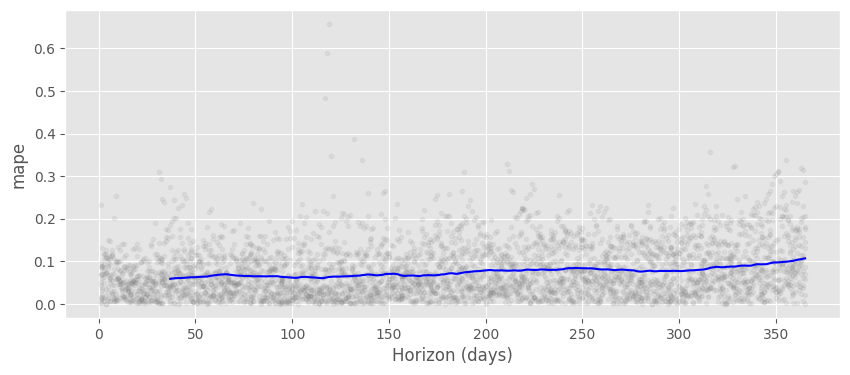

In [139]:
# We see for this forecast that errors around 5% are typical for predictions
# one month into the future, and that errors increase up to around 11% for
# predictions that are a year out.

plot_cross_validation_metric(df_cv, metric='mape', figsize = (10, 4));

### Hyperparameter tuning

Prophet is able to tune the hyperparameters and the modt important ones are the following:
- _changepoint_prior_scale_ tune the flexibility of the model. The default of 0.05 works for many time series, but this could be tuned; a range of [0.001, 0.5] would likely be about right. it is a L2 regularization (lasso).
- _seasonality_prior_scale_ controls the flexibility of the seasonality. The default is 10., which applies basically no regularization because overfitting occurs very rarely. A reasonable range for tuning it would probably be [0.01, 10].
- _holidays_prior_scale_ controls flexibility to fit holiday effects.
- _seasonality_mode_: options are ['additive', 'multiplicative']

Maybe we can tune _changepoint_range_, i.e. this is the proportion of the history in which the trend is allowed to change. Don't change the growth, unless you have a sensible reason; changepoints; n_changepoints, because you focus on regularization; yearly_seasonality, weekly_seasonality and daily_seasonality are automatically added based on the frequency of data; mcmc_samples; interval_width; uncertainty_samples.

In [143]:
import itertools

In [ ]:
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    print(params)
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

### Handling shocks

In order to handle the covid period, add some regressors. Note that since we don’t specify any future dates, Prophet will assume that these holidays will not occur again when creating the future dataframe (and hence they won’t affect our projections). This is different to how we would specify a recurring holiday.

On the other hand, these patterns could be removed and fitted by Prophet.

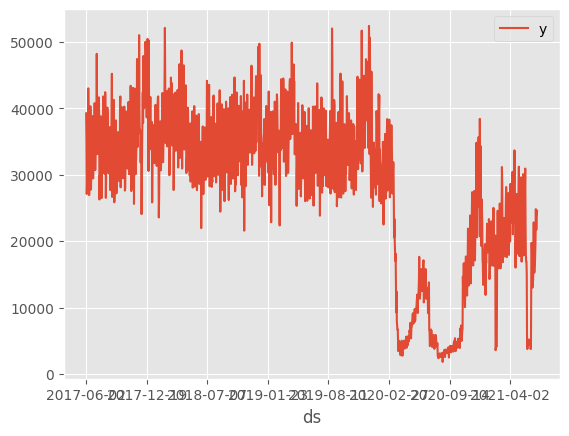

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_pedestrians_covid.csv')
df.set_index('ds').plot();

In [18]:
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-21', 'lower_window': 0, 'ds_upper': '2020-06-06'},
    {'holiday': 'lockdown_2', 'ds': '2020-07-09', 'lower_window': 0, 'ds_upper': '2020-10-27'},
    {'holiday': 'lockdown_3', 'ds': '2021-02-13', 'lower_window': 0, 'ds_upper': '2021-02-17'},
    {'holiday': 'lockdown_4', 'ds': '2021-05-28', 'lower_window': 0, 'ds_upper': '2021-06-10'},
])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days
lockdowns

holiday         ds  lower_window   ds_upper  upper_window
0  lockdown_1 2020-03-21             0 2020-06-06            77
1  lockdown_2 2020-07-09             0 2020-10-27           110
2  lockdown_3 2021-02-13             0 2021-02-17             4
3  lockdown_4 2021-05-28             0 2021-06-10            13

10:26:48 - cmdstanpy - INFO - Chain [1] start processing
10:26:49 - cmdstanpy - INFO - Chain [1] done processing


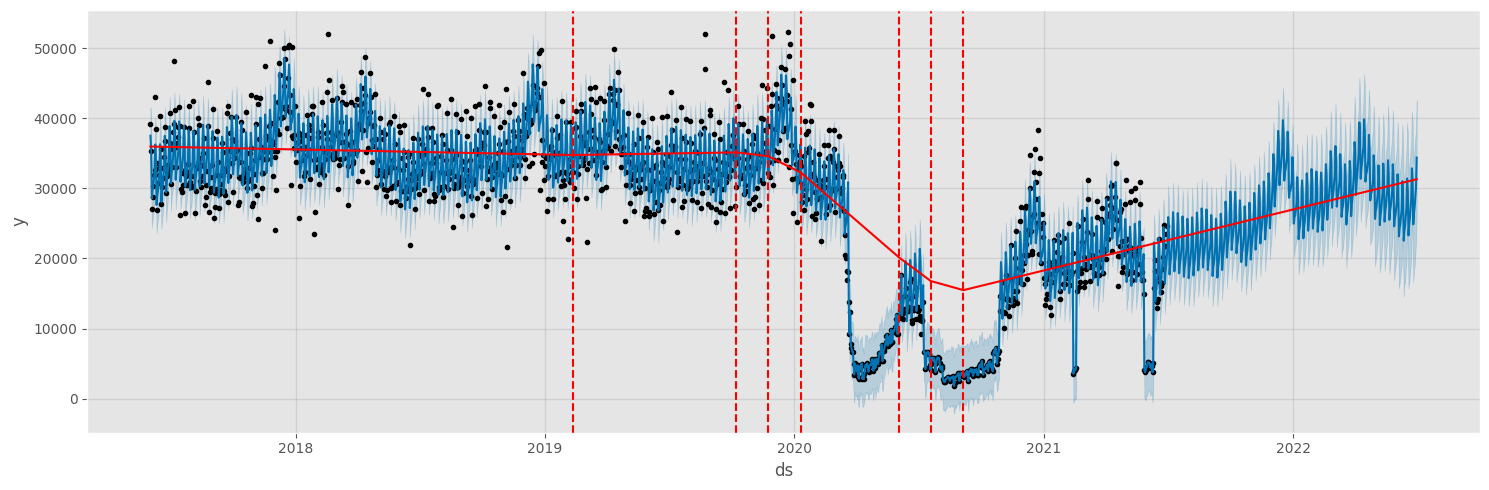

In [22]:
m2 = Prophet(holidays=lockdowns)
m2 = m2.fit(df)
future2 = m2.make_future_dataframe(periods=366)
forecast2 = m2.predict(future2)
fig = m2.plot(forecast2, figsize = (15, 5))
a = add_changepoints_to_plot(fig.gca(), m2, forecast2)

10:29:11 - cmdstanpy - INFO - Chain [1] start processing
10:29:14 - cmdstanpy - INFO - Chain [1] done processing


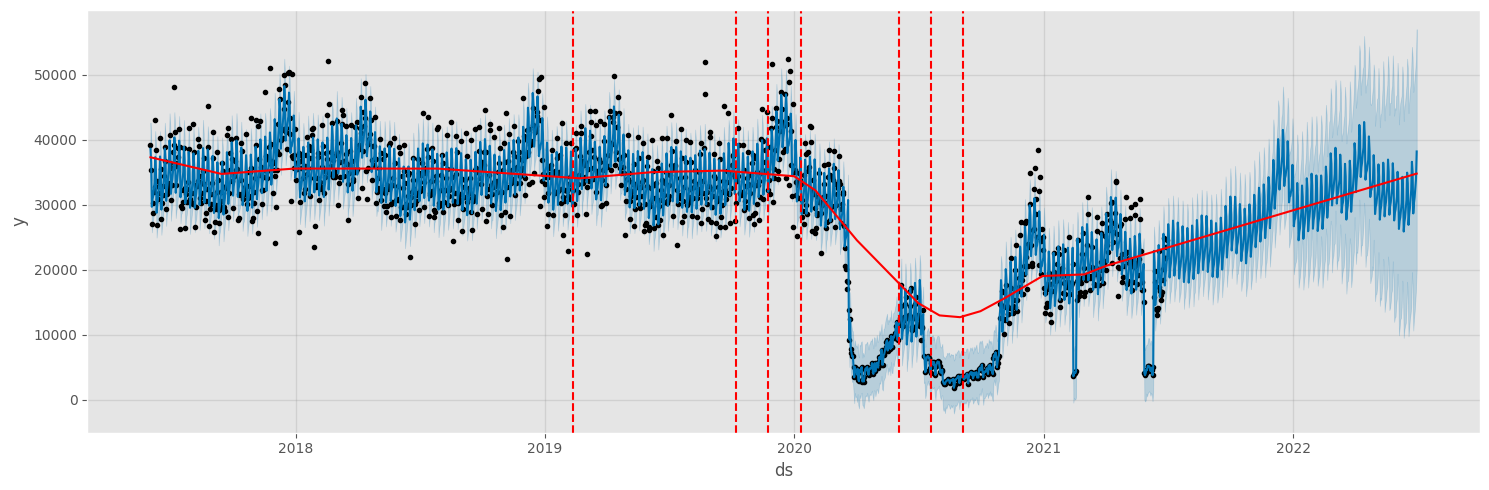

In [26]:
# it could be reasonable to add some changepoints at the end of 2020:
# however, the interval are more uncertain and so, it is better to choose the pevious model.

m3_changepoints = (
    # 10 potential changepoints in 2.5 years
    pd.date_range('2017-06-02', '2020-01-01', periods=10).date.tolist() +
    # 15 potential changepoints in 1 year 2 months
    pd.date_range('2020-02-01', '2021-04-01', periods=15).date.tolist()
)
m3 = Prophet(holidays=lockdowns, changepoints=m3_changepoints, changepoint_prior_scale=1.0)
m3 = m3.fit(df)
forecast3 = m3.predict(future2)
fig = m3.plot(forecast3, figsize = (15, 5))
a = add_changepoints_to_plot(fig.gca(), m2, forecast3)

### Save models

In [ ]:
from prophet.serialize import model_to_json, model_from_json

In [ ]:
with open('serialized_model.json', 'w') as fout:
    fout.write(model_to_json(m))  # Save model

with open('serialized_model.json', 'r') as fin:
    m = model_from_json(fin.read())  # Load model